In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Reading In Data

In [19]:
call14 = pd.read_csv('CAD_data_through_2025/class_data_2014.csv')
call14.head()

,yr,service,inci_id,calltime,case_id,callsource,nature,closecode,closed_as,secs_to_disp,secs_to_arrv,secs_to_close,disp,arrv,beat,priority,zip,primeunit,units_dispd,units_arrived
0,2014,LAW,14000001,2014-01-01 00:00:05.000,NaN,SELF,TRAFFIC STOP,UTC,UNIFORM TRAFFIC CITATION ISSUED,1.0,1.0,690,1,1,EP05,6,97402,5Z51,1,1
1,2014,LAW,14000003,2014-01-01 00:01:50.000,NaN,SELF,TRAFFIC STOP,ADVI,ADVISED,0.0,0.0,170,1,1,EP02,6,97401,5T82,2,2
2,2014,LAW,14000006,2014-01-01 00:05:17.000,NaN,PHONE,DISPUTE,ADVI,ADVISED,219.0,596.0,1444,1,1,EP01,3,97401,5E93,3,2
3,2014,LAW,14000007,2014-01-01 00:08:36.000,NaN,SELF,TRAFFIC STOP,WARN,WARNING,0.0,0.0,427,1,1,EP02,6,97401,5E31,2,2
4,2014,LAW,14000011,2014-01-01 00:10:21.000,NaN,E911,THEFT,RSLV,RESOLVED,168.0,380.0,1126,1,1,EP05,3,97402,6E45,2,2


In [51]:
call15 = pd.read_csv("CAD_data_through_2025/class_data_2015.csv")
call16 = pd.read_csv("CAD_data_through_2025/class_data_2016.csv")
call17 = pd.read_csv("CAD_data_through_2025/class_data_2017.csv", low_memory=False)
call18 = pd.read_csv("CAD_data_through_2025/class_data_2018.csv", low_memory=False)
call19 = pd.read_csv("CAD_data_through_2025/class_data_2019.csv", low_memory=False)
call20 = pd.read_csv("CAD_data_through_2025/class_data_2020.csv", low_memory=False)
call21 = pd.read_csv("CAD_data_through_2025/class_data_2021.csv", low_memory=False)
call22 = pd.read_csv("CAD_data_through_2025/class_data_2022.csv", low_memory=False)
call23 = pd.read_csv("CAD_data_through_2025/class_data_2023.csv", low_memory=False)
call24 = pd.read_csv("CAD_data_through_2025/class_data_2024.csv", low_memory=False)
call25 = pd.read_csv("CAD_data_through_2025/class_data_2025.csv", low_memory=False)


In [52]:
call = pd.concat([call14, call15, call16, call17, call18, call19, call20, call21, call22, call23, call24, call25], axis=0, join='outer', ignore_index=True)
call.head()

,yr,service,inci_id,calltime,case_id,callsource,nature,closecode,closed_as,secs_to_disp,secs_to_arrv,secs_to_close,disp,arrv,beat,priority,zip,primeunit,units_dispd,units_arrived
0,2014,LAW,14000001,2014-01-01 00:00:05.000,NaN,SELF,TRAFFIC STOP,UTC,UNIFORM TRAFFIC CITATION ISSUED,1.0,1.0,690,1,1,EP05,6,97402,5Z51,1,1
1,2014,LAW,14000003,2014-01-01 00:01:50.000,NaN,SELF,TRAFFIC STOP,ADVI,ADVISED,0.0,0.0,170,1,1,EP02,6,97401,5T82,2,2
2,2014,LAW,14000006,2014-01-01 00:05:17.000,NaN,PHONE,DISPUTE,ADVI,ADVISED,219.0,596.0,1444,1,1,EP01,3,97401,5E93,3,2
3,2014,LAW,14000007,2014-01-01 00:08:36.000,NaN,SELF,TRAFFIC STOP,WARN,WARNING,0.0,0.0,427,1,1,EP02,6,97401,5E31,2,2
4,2014,LAW,14000011,2014-01-01 00:10:21.000,NaN,E911,THEFT,RSLV,RESOLVED,168.0,380.0,1126,1,1,EP05,3,97402,6E45,2,2


## Cleaning Data and Calculating Variables

* Dropping unnecessary columns
* Synchronizing the 'primeunit' column
* Dropping uneccesary columns
* Calculating response time
    * Calculated response time by secs_to_arrv - secs_to_disp
    * Dropped the rows where 'callsource' == self since this could skew the response time. 
    * __ values had negative response times. I dropped this rows as I expect they were data entry errors.


In [32]:
call.drop(['inci_id', "case_id", 'closecode', 'closed_as', 'disp', 'arrv', 'beat', 'zip','units_dispd', 'units_arrived'], axis = 1, inplace=True)

In [33]:
call['calltime'] = pd.to_datetime(call["calltime"])
call['month'] = call['calltime'].dt.month

In [34]:
call.dropna(subset = ['primeunit', 'secs_to_arrv', 'secs_to_disp'], inplace=True)

Cleaning 'primeunit'

In [35]:
cht_primary = call['primeunit'].isin(["1J77","3J79","3J78","3J77","4J79","3J81","3J76","2J28","2J29","CAHOOT","CAHOT","CAHO"])
call.loc[cht_primary,'primeunit' ] = 'CAHOT'
call.loc[call['primeunit'] != 'CAHOT', 'primeunit'] = 'EPD'

In [36]:
call['primeunit'].unique()

array(['EPD', 'CAHOT'], dtype=object)

Calculating response time

In [37]:
call['response_time'] = (call['secs_to_arrv'] - call["secs_to_disp"])/ 60

In [38]:
response_time = (call['secs_to_arrv'] - call["secs_to_disp"])/60

In [39]:
zero_time_source = call[call['response_time']== 0]['callsource'].value_counts().reset_index()
zero_time_nature = call[call['response_time']== 0]['nature'].value_counts().reset_index()


In [40]:
zero_time_source

,callsource,count
0,SELF,343369
1,PHONE,53411
2,W911,9224
3,E911,5830
4,RPTO,32
5,CNTR,25
6,RADIO,3
7,TWX,3
8,TTY,2
9,DESK,1


<Axes: ylabel='count'>

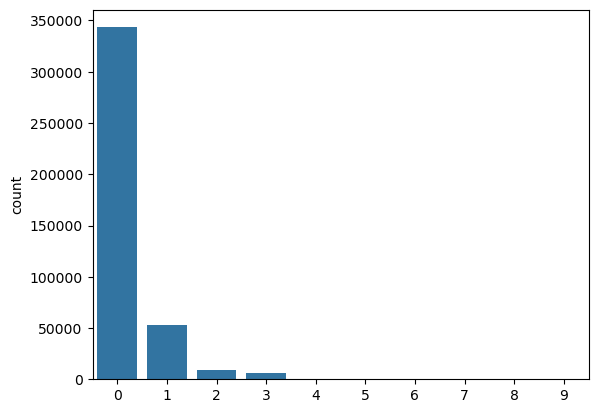

In [41]:
sns.barplot(zero_time_source['count'])

/var/folders/v9/p__zvt1n391cg86l79v2m3b00000gn/T/ipykernel_85327/2561269518.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(zero_time_source['callsource'], rotation=45)
/var/folders/v9/p__zvt1n391cg86l79v2m3b00000gn/T/ipykernel_85327/2561269518.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(zero_time_nature['nature'], rotation=45)


[Text(0, 0, 'TRAFFIC STOP'),
 Text(1, 0, 'PATROL CHECK'),
 Text(2, 0, 'PERSON STOP'),
 Text(3, 0, 'FOLLOW UP'),
 Text(4, 0, 'CRIMINAL TRESPASS'),
 Text(5, 0, 'BEAT INFORMATION'),
 Text(6, 0, 'ASSIST PUBLIC- POLICE'),
 Text(7, 0, 'DISORDERLY SUBJECT'),
 Text(8, 0, 'DISABLED VEHICLE'),
 Text(9, 0, 'CITIZEN CONTACT')]

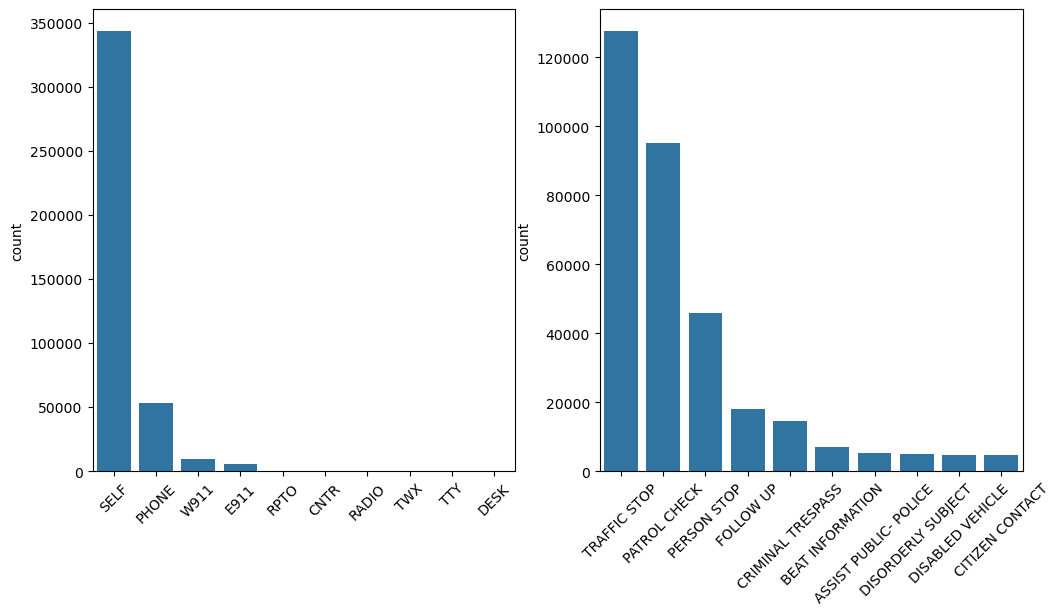

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.barplot(zero_time_source['count'], ax = axes[0])
sns.barplot(zero_time_nature.head(10)['count'], ax = axes[1])
axes[0].set_xticklabels(zero_time_source['callsource'], rotation=45)
axes[1].set_xticklabels(zero_time_nature['nature'], rotation=45)



The overwheming majority of callsource is SELF when response time is equal to zero. I will drop callsource == SELF for my analysis to avoid skewing the response times. 

In [43]:
call = call.loc[call['callsource'] != 'SELF']

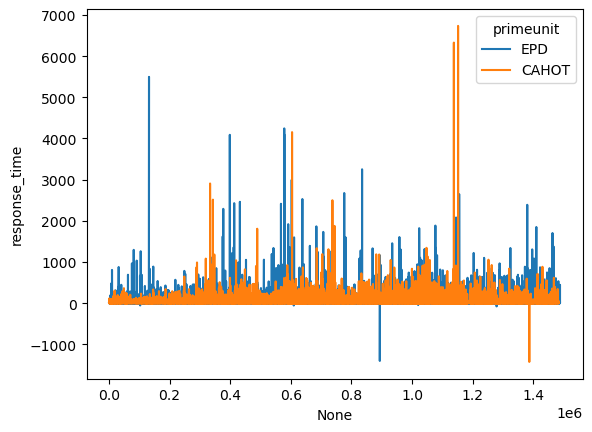

In [44]:
sns.lineplot(data=call, x=call.index, y='response_time', hue='primeunit');

In [45]:
call[call['response_time'] < 0].shape[0]

24

In [46]:
call = call.loc[call['response_time'] >= 0]

In [47]:
call.to_csv('call.csv')